<a href="https://colab.research.google.com/github/rohithroshan374/chennai-house-price-prediction-/blob/main/CENNAI_HOUSES_PRICE_PREDICTION_ROHITHROSHAN_R_ipynd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHENNAI HOUSE PRICE PREDICTION

**Problem Statement:**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


**Minimum Requirements:**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

**OBJECTIVE**

First of all, to start, we will import some libraries:

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

Import Data & Overview

In [ ]:
data = pd.read_csv('train-chennai-sale.csv')

data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
 data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
#Get the no of rows and columns
data.shape

(7109, 22)

In [ ]:
#Get all the column names
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
#Information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
#Get the sum of all na values from dataset
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
#Print the nal value columns
print(data.dtypes[["N_BEDROOM","N_BATHROOM","QS_OVERALL"]])

N_BEDROOM     float64
N_BATHROOM    float64
QS_OVERALL    float64
dtype: object


In [ ]:
#Applying in the mean function.
#Treating the missing values.  
data = data. fillna( {"N_BEDROOM":  data ["N_BEDROOM"].mean(), 
                  "N_BATHROOM": data ["N_BATHROOM"].mean(), 
                  "QS_OVERALL": data ["QS_OVERALL"].mean()})

In [ ]:
#We get the zero number of nal values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
#Check the data types
data["DATE_SALE"]=pd.to_datetime(data["DATE_SALE" ])
data["DATE_BUILD"]=pd.to_datetime(data["DATE_BUILD"])
print(data.dtypes[["DATE_SALE","DATE_BUILD"]])

DATE_SALE     datetime64[ns]
DATE_BUILD    datetime64[ns]
dtype: object


In [ ]:
#Cerate the new colum
# Output will be a pandas Series with DateTime objects as values.
data["BUILD_AGE"]= data["DATE_SALE"] -data["DATE_BUILD"]
#To convert DateTime objects in the Series to numerical (float) values..
data["BUILD_AGE"]=data ["BUILD_AGE"]/np.timedelta64(1, 'D') 
data["BUILD_AGE"]

0       16031.0
1        4015.0
2        7152.0
3        8030.0
4       10802.0
         ...   
7104    17942.0
7105     3196.0
7106    10455.0
7107    11443.0
7108    16060.0
Name: BUILD_AGE, Length: 7109, dtype: float64

In [ ]:
#Converted into integer type
data ['N_BEDROOM'] = data ['N_BEDROOM'].astype(int)
data ['N_BATHROOM'] = data ['N_BATHROOM'].astype(int)

**Drop the unnecessary colums**

In [ ]:
#Drop the unnecessary colums
data.drop(columns=["PRT_ID","REG_FEE","COMMIS","DATE_SALE"],inplace=True)



*   Above the columns not important to price prediction




In [ ]:
#Get the categorical columns
data_catS=data.select_dtypes(include=["object"])
print(f"number of categorical columns={data_catS.shape[1]}/n")
print("the categorical columns are as following:/n",list(data_catS.columns))

number of categorical columns=7/n
the categorical columns are as following:/n ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031.0
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015.0
2,Adyar,909,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152.0
3,Velachery,1855,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030.0
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802.0


In [ ]:
#Again checking the nal value
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
BUILD_AGE        0
dtype: int64

# Spelling correction of value in categorical columns

**AREA**

In [ ]:
#The Value counts of AREA
data.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
#differen types of spellings mistakes,they all are same
data['AREA'].replace({"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet"},inplace=True)
data['AREA'].replace("Karapakam", "Karapakkam", inplace = True)
data['AREA'].replace({'Velchery':'Velachery'},inplace=True)
data['AREA'].replace("KKNagar", "KK Nagar", inplace = True)
data['AREA'].replace({"Ana Nagar": "Anna Nagar", "Ann Nagar": "Anna Nagar"}, inplace=True)
data['AREA'].replace("Adyr", "Adyar", inplace = True)
data['AREA'].replace("TNagar", "T Nagar", inplace=True)

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64 



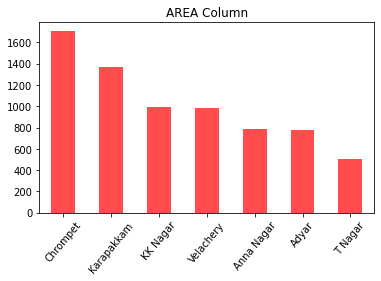

In [ ]:
#The Barplot showing the number of value in AREA column
print(data.AREA.value_counts(),"\n")
plt.figure(figsize=(6,3.5))
plt.title("AREA Column")
data.AREA.value_counts().plot(kind='bar', color="red", alpha=0.7)
plt.xticks (rotation=50)
plt.show()



*   The Barplot showing the number of value in AREA columns
*   The AREA contains 7 features





**SALES CONDITION**

In [ ]:
#The Value count of SALES_COND
data.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
#different types of spellings mistakes,they all are same
data['SALE_COND'].replace("Adj Land", "AdjLand", inplace = True)
data['SALE_COND'].replace("Ab Normal", "AbNormal", inplace = True)
data['SALE_COND'] = data['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial')

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64 



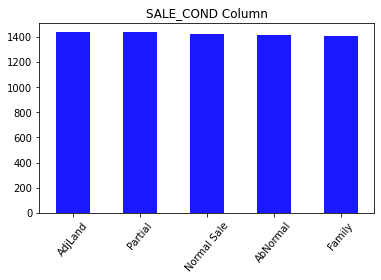

In [ ]:
#The Barplot showing the number of value in SALE CONDITION column
print(data.SALE_COND.value_counts(),"\n")
plt.figure(figsize=(6,3.5))
plt.title("SALE_COND Column")
data.SALE_COND.value_counts().plot(kind='bar', color="B", alpha=0.9)
plt.xticks (rotation=50)
plt.show()



*   The Barplot showing the number of value in SALE CONDITION columns

*   The SALE CONDITION contains 5 features



**PARKING FACILITY**

In [ ]:
#The Value count of PARK_FACIL
data.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [ ]:
# one spellings mistakes
data['PARK_FACIL'].replace("Noo","No",inplace=True) 

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64 



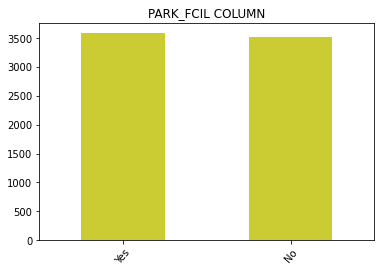

In [ ]:
#The Barplot showing the number of value in PARKING FACILITY column
print(data.PARK_FACIL.value_counts(),"\n")
plt.figure(figsize=(6,4))
plt.title("PARK_FCIL COLUMN")
data.PARK_FACIL.value_counts().plot(kind='bar', color="Y", alpha=0.8)
plt.xticks(rotation=50)
plt.show()



*   The Barplot showing the number of value in PARKING FACILITY COLUMNS 
*   The PARKING FACILITY contains 2 features



**BUILDTYPE**



*   BUILDTYPE=Type of building




In [ ]:
#The Value count BUILDTYPE
data.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
#different types of spellings mistakes,they all are same
data['BUILDTYPE'].replace("Other","Others",inplace=True)
data['BUILDTYPE'].replace("Comercial","Commercial",inplace=True)

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64 



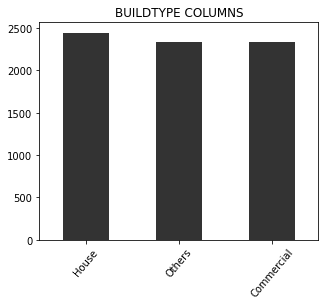

In [ ]:
#The Barplot showing the number of value in  BUILDTYPE column
print(data.BUILDTYPE.value_counts(),"\n")
plt.figure(figsize=(5,4))
plt.title("BUILDTYPE COLUMNS")
data.BUILDTYPE.value_counts().plot(kind='bar', color="K", alpha=0.8)
plt.xticks(rotation=50)
plt.show()




*   The Barplot showing the number of value in BUILDTYPE COLUMNS


*   The BUILDTYPE contains 3 features



**UTILITY_AVAIL**

In [ ]:
#The Value OF UTILITY_AVAIL
data.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
# one spellings mistakes
data["UTILITY_AVAIL"].replace("All Pub","AllPub",inplace=True)


AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64 /n


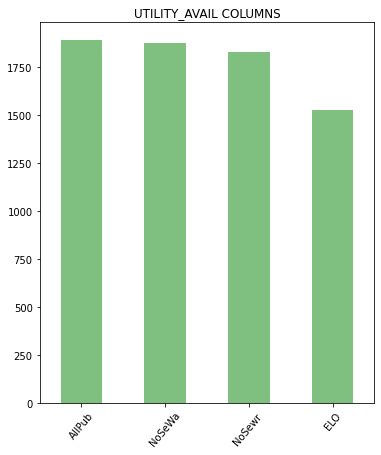

In [ ]:
#The Barplot showing the number of value in UTILITY_AVAIL column
print(data.UTILITY_AVAIL.value_counts(),"/n")
plt.figure(figsize=(6,7))
plt.title("UTILITY_AVAIL COLUMNS")
data.UTILITY_AVAIL.value_counts().plot(kind='bar', color="g", alpha=0.5)
plt.xticks(rotation=50)
plt.show()





*   The Barplot showing the number of value in UTILITY_AVAIL COLUMNS

*   The BUILDTYPE contains 4 features



**STREET**

In [ ]:
#The Value Of STREET
data.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
#different types of spellings mistakes,they all are same
data["STREET"].replace("NoAccess","No Access",inplace=True)
data["STREET"].replace("Pavd","Paved",inplace=True)

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64 /n


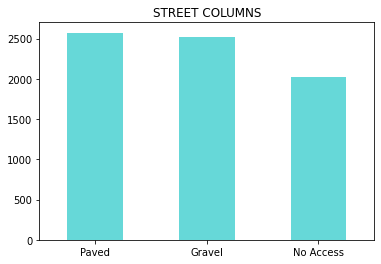

In [ ]:
#The Barplot showing the number of value in UTILITY_AVAIL column
print(data.STREET.value_counts(),"/n")
plt.figure(figsize=(6,4))
plt.title("STREET COLUMNS")
data.STREET.value_counts().plot(kind='bar',color="c",alpha=0.6)
plt.xticks(rotation="horizontal")
plt.show()



*   The Barplot showing the number of value in STREET COLUMNS

*   The BUILDTYPE contains 3 features



**MZZONE**

In [ ]:
#The Value OF MZZONE
data.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64 /n


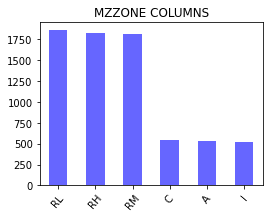

In [ ]:
#The Barplot showing the number of value in MZZONE column
print(data.MZZONE.value_counts(),"/n")
plt.figure(figsize=(4,3))
plt.title("MZZONE COLUMNS")
data.MZZONE.value_counts().plot(kind='bar',color="b",alpha=0.6)
plt.xticks(rotation=50)
plt.show()



*   List itemThe Barplot showing the number of value in STREET COLUMNS


*   The BUILDTYPE contains 6 features



In [ ]:
#get the categorical value
data_catS.columns
data_catS.head()

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakkam,AbNormal,Yes,Commercial,AllPub,Paved,A
1,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH
2,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,Velachery,Family,No,Others,NoSewr,Paved,I
4,Karapakkam,AbNormal,Yes,Others,AllPub,Gravel,C


**Exploratory Data Analysis (EDA)**

**AREA VS SALE PRICE**

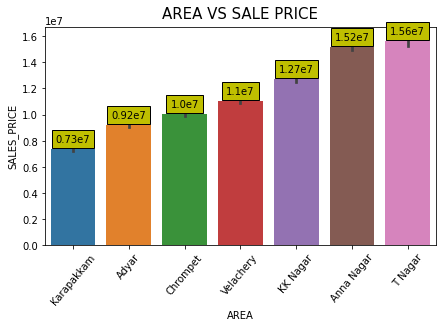

In [ ]:
#The plot show area vs sales price
plt.figure(figsize=(7,4))
plt.title("AREA VS SALE PRICE",fontsize=15,va="bottom")
result=data.groupby(["AREA"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
br1=sns.barplot(x="AREA",y="SALES_PRICE",data=data,order=result["AREA"])
for p in br1.patches:
  br1.annotate(str(round(p.get_height()/10**7,2))+"e7",
                xy=(p.get_x()+p.get_width()/2,p.get_height()+0.4*10**6),
                ha="center",va="bottom",bbox=dict(boxStyle="round",fc="y"))
plt.xticks(rotation=50)
plt.show()  



*   The T Nagar have very expensive house
*   The Karapakkam has the cheapest house

*   The label and coding is better option






**SALE CONDITION VS SALE PRICE**

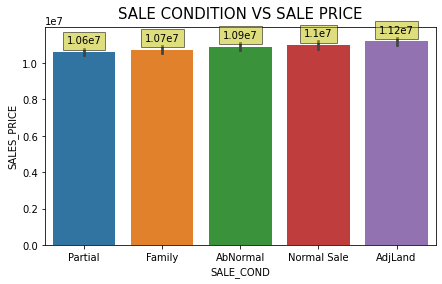

In [ ]:
#The plot show salescondition vs sales price
plt.figure(figsize=(7,4))
plt.title("SALE CONDITION VS SALE PRICE",fontsize=15,va="bottom")
result=data.groupby(["SALE_COND"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
br2=sns.barplot(x="SALE_COND",y="SALES_PRICE",data=data,order=result["SALE_COND"])
for p in br2.patches:
  br2.annotate(str(round(p.get_height()/10**7,2))+"e7",
                xy=(p.get_x()+p.get_width()/2,p.get_height()+0.35*10**6),
                ha="center",va="bottom",bbox=dict(boxStyle="round",fc="y",alpha=0.5))
#plt.xticks(rotation=50)
plt.show()  




*   Adjland has of highest price
*   So thelabel and coding feature



**PARKING FACILITY VS SALE PRICE**

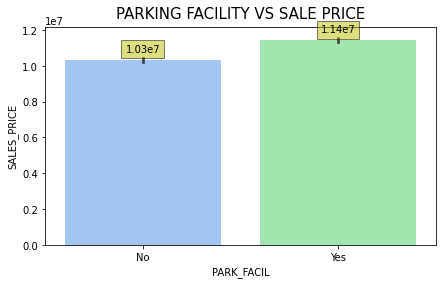

In [ ]:
#The plot show parking facility vs sales price
plt.style.use("seaborn-pastel")
plt.figure(figsize=(7,4))
plt.title("PARKING FACILITY VS SALE PRICE",fontsize=15,va="bottom")
result=data.groupby(["PARK_FACIL"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
br3=sns.barplot(x="PARK_FACIL",y="SALES_PRICE",data=data,order=result["PARK_FACIL"])
for p in br3.patches:
  br3.annotate(str(round(p.get_height()/10**7,2))+"e7",
                xy=(p.get_x()+p.get_width()/2,p.get_height()+0.3*10**6),
                ha="center",va="bottom",bbox=dict(boxStyle="round",fc="y",alpha=0.5))
plt.show()  



*   Most of the house has parking facility




**BUILDTYPE VS SALE PRICE**

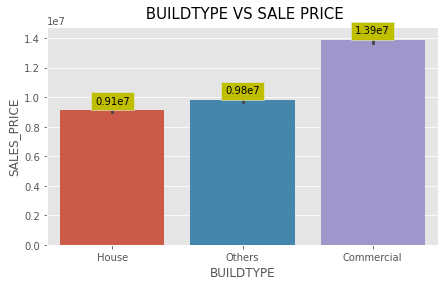

In [ ]:
#The plot show buildtype vs sales price
plt.style.use("ggplot")
plt.figure(figsize=(7,4))
plt.title(" BUILDTYPE VS SALE PRICE",fontsize=15,va="bottom")
result=data.groupby(["BUILDTYPE"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
br4=sns.barplot(x="BUILDTYPE",y="SALES_PRICE",data=data,order=result["BUILDTYPE"])
for p in br4.patches:
  br4.annotate(str(round(p.get_height()/10**7,2))+"e7",
                xy=(p.get_x()+p.get_width()/2,p.get_height()+0.3*10**6),
                ha="center",va="bottom",bbox=dict(boxStyle="round",fc="y"))
plt.show()  



*   the Commercial is highest price
*   House is lowest price


*   This is One hot encoding







**UTILITY AVAIL VS SALE PRICE**

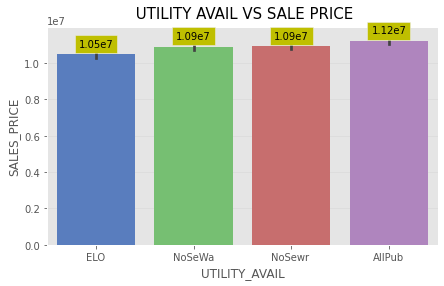

In [ ]:
#The plot show utility avail vs sales price
plt.style.use("seaborn-muted")
plt.figure(figsize=(7,4))
plt.title(" UTILITY AVAIL VS SALE PRICE",fontsize=15,va="bottom")
result=data.groupby(["UTILITY_AVAIL"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
br5=sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=data,order=result["UTILITY_AVAIL"])
for p in br5.patches:
  br5.annotate(str(round(p.get_height()/10**7,2))+"e7",
                xy=(p.get_x()+p.get_width()/2,p.get_height()+0.3*10**6),
                ha="center",va="bottom",bbox=dict(boxStyle="round",fc="y"))
plt.grid(True,axis="y",color="lightgrey",alpha=0.5)
plt.show()  



*   There is a linear relationship
*   The best label and coding feature



**STREET VS SALE PRICE**

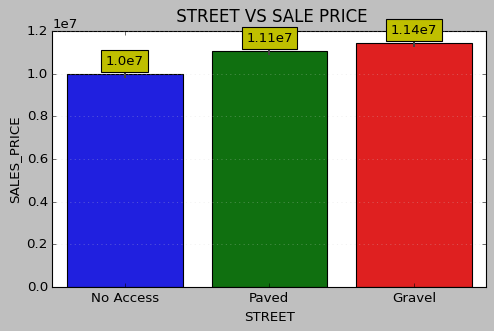

In [ ]:
#The plot show street vs sales price
plt.style.use("classic")
plt.figure(figsize=(7,4))
plt.title(" STREET VS SALE PRICE",fontsize=15,va="bottom")
result=data.groupby(["STREET"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
br6=sns.barplot(x="STREET",y="SALES_PRICE",data=data,order=result["STREET"])
for p in br6.patches:
  br6.annotate(str(round(p.get_height()/10**7,2))+"e7",
                xy=(p.get_x()+p.get_width()/2,p.get_height()+0.3*10**6),
                ha="center",va="bottom",bbox=dict(boxStyle="round",fc="y"))
plt.grid(True,axis="y",color="lightgrey",alpha=0.5)
plt.show()  



*   The gravel street is very highest and expensive price
*   No access is lowest price

*   There is table  encoding feature





**ZONE VS SALE PRICE**

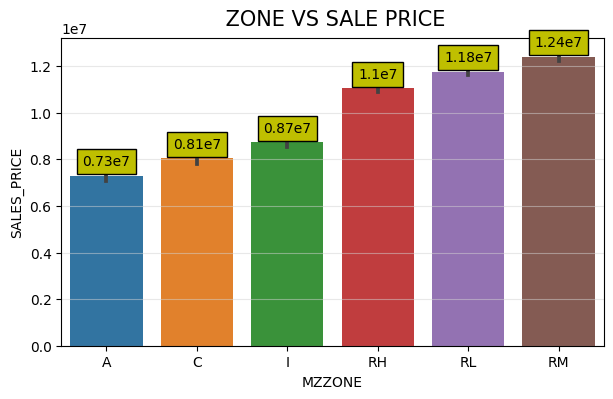

In [ ]:
#The plot mzzone vs sales price
plt.style.use("default")
plt.figure(figsize=(7,4))
plt.title(" ZONE VS SALE PRICE",fontsize=15,va="bottom")
result=data.groupby(["MZZONE"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
br7=sns.barplot(x="MZZONE",y="SALES_PRICE",data=data,order=result["MZZONE"])
for p in br7.patches:
  br7.annotate(str(round(p.get_height()/10**7,2))+"e7",
                xy=(p.get_x()+p.get_width()/2,p.get_height()+0.3*10**6),
                ha="center",va="bottom",bbox=dict(boxStyle="round",fc="y"))
plt.grid(True,axis="y",color="lightgrey",alpha=0.5)
plt.show()  





*   the Rm is the highest price
*   the A is a lowest price




**PIE CHART FOR ALL CATEGORICAL FEATURES**

([<matplotlib.patches.Wedge at 0x7f3361cdef50>,
 [Text(-0.8050726499940565, 0.7495718966393734, ''),
  Text(-0.703792425895269, -0.8453852501980694, ''),
  Text(0.8710708792600887, -0.6717406667048348, ''),
  Text(1.0177723853454705, 0.4173000978051542, ''),
  Text(0.7097521835181461, 0.8403879092366955, ''),
  Text(0.2874137423151309, 1.2165086685792303, '')],
 [Text(-0.4391305363603944, 0.40885739816693095, '26.1%'),
  Text(-0.3838867777610558, -0.4611192273807651, '25.6%'),
  Text(0.4751295705055029, -0.3664040000208189, '25.6%'),
  Text(0.5551485738248021, 0.2276182351664477, '7.7%'),
  Text(0.38713755464626143, 0.4583934050381975, '7.6%'),
  Text(0.17244824538907852, 0.7299052011475382, '7.4%')])

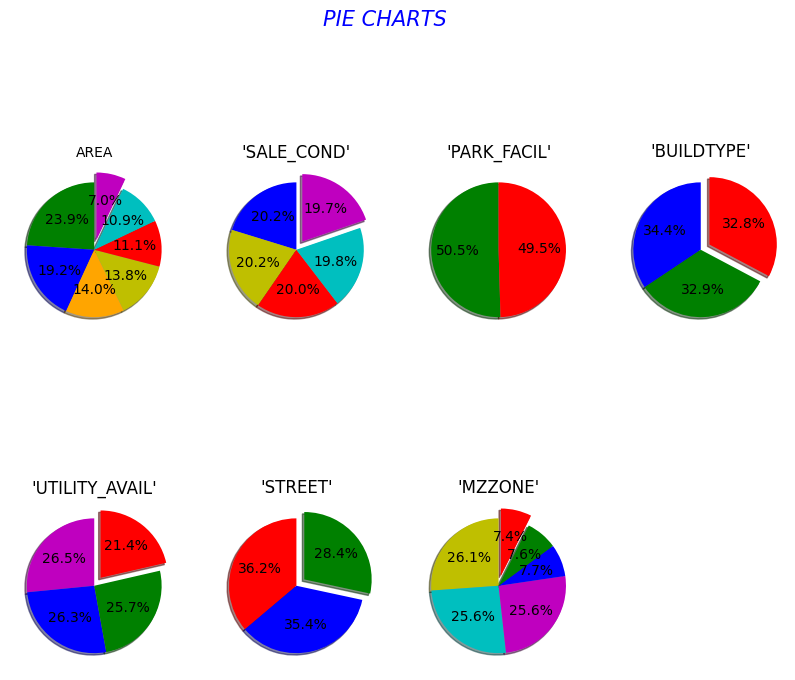

In [ ]:
fig=plt.figure(figsize=(10,8))
fig.suptitle("PIE CHARTS",fontsize=15,color="blue",style="italic",ha="center",va="bottom")
#subplot  for area
plt.subplot(241)
plt.title("AREA",fontsize=10)
data_area=data["AREA"].value_counts()
ex=[0,0,0,0,0,0,0.15]
clr=["g","b","orange","y","r","c","m"]
label=data_area.index
plt.pie(data_area,startangle=90,autopct="%.1f%%",colors=clr,explode=ex,shadow=True)
#subplot for sales condition 
plt.subplot(242)
plt.title("'SALE_COND'",fontsize=12)
data_sc=data["SALE_COND"].value_counts()
ex=[0,0,0,0,0.15]
clr=["b","y","r","c","m"]
label=data_sc.index
plt.pie(data_sc,startangle=90,autopct="%.1f%%",colors=clr,explode=ex,shadow=True)

plt.subplot(243)
plt.title("'PARK_FACIL'",fontsize=12)
data_pf=data["PARK_FACIL"].value_counts()
clr=["g","r"]
label=data_pf.index
plt.pie(data_pf,startangle=90,autopct="%.1f%%",colors=clr,shadow=True)
#subplot for buildtype
plt.subplot(244)
plt.title("'BUILDTYPE'",fontsize=12)
data_bt=data["BUILDTYPE"].value_counts()
ex=[0,0,0.15]
clr=["b","g","r"]
label=data_bt.index
plt.pie(data_bt,startangle=90,autopct="%.1f%%",colors=clr,explode=ex,shadow=True)

#subplot for utility_avail
plt.subplot(245)
plt.title("'UTILITY_AVAIL'",fontsize=12)
data_ua=data["UTILITY_AVAIL"].value_counts()
ex=[0,0,0,0.15]
clr=["m","b","g","r"]
label=data_ua.index
plt.pie(data_ua,startangle=90,autopct="%.1f%%",colors=clr,explode=ex,shadow=True)

#subplot for street
plt.subplot(246)
plt.title("'STREET'",fontsize=12)
data_st=data["STREET"].value_counts()
ex=[0,0,0.15]
clr=["r","b","g","b"]
label=data_st.index
plt.pie(data_st,startangle=90,autopct="%.1f%%",colors=clr,explode=ex,shadow=True)



#the subplot  for Mzzone
plt.subplot(247)
plt.title("'MZZONE'",fontsize=12)
data_mz=data["MZZONE"].value_counts()
ex=[0,0,0,0,0,0.15]
clr=["y","c","m","b","g","r"]
label=data_mz.index
plt.pie(data_mz,startangle=90,autopct="%.1f%%",colors=clr,explode=ex,shadow=True)






the plot represent all categorical feature

# Histogram plot for continues columns values

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031.0
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015.0
2,Adyar,909,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152.0
3,Velachery,1855,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030.0
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802.0


**INT_SQFT**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


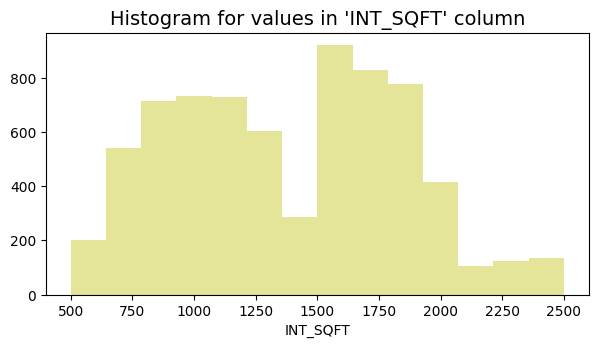

In [ ]:
#Histogram for values in 'INT_SQFT' column
plt.figure(figsize=(7,3.4))
plt.title("Histogram for values in 'INT_SQFT' column",fontsize=14)
sns.distplot(data["INT_SQFT"],hist=True,kde=False,bins="sturges",color="y")
plt.show()

**DIST_MAINROAD**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


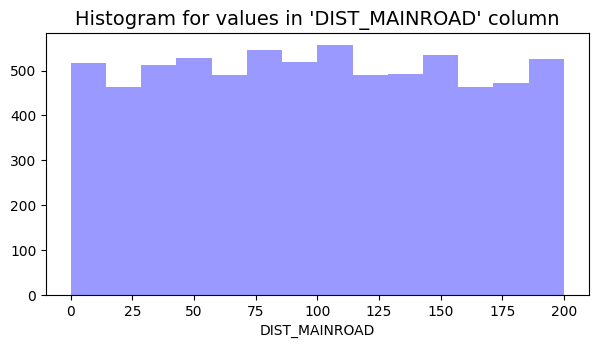

In [ ]:
#Histogram for values in 'DIST_MAINROAD' column
plt.figure(figsize=(7,3.4))
plt.title("Histogram for values in 'DIST_MAINROAD' column",fontsize=14)
sns.distplot(data["DIST_MAINROAD"],hist=True,kde=False,bins="sturges",color="b")
plt.show()

**BUILD_AGE**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


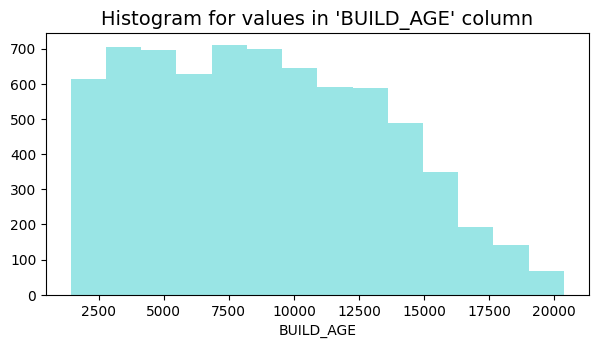

In [ ]:
#Histogram for values in 'BUILD_AGE' column
plt.figure(figsize=(7,3.4))
plt.title("Histogram for values in 'BUILD_AGE' column",fontsize=14)
sns.distplot(data["BUILD_AGE"],hist=True,kde=False,bins="sturges",color="c")
plt.show()

# **Numericalcolumns vs sales price (scatter plot and bar plot)** 

**INT_SQFT VS SALES_PRICE**

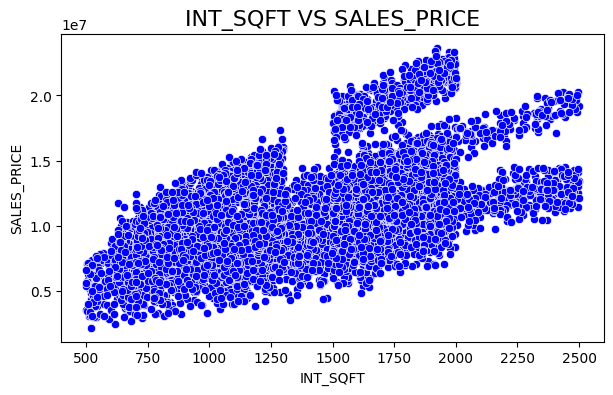

In [ ]:
#The plot INT_SQFT vs sales price
plt.figure(figsize=(7,4))
plt.title("INT_SQFT VS SALES_PRICE",fontsize=16)
sp1=sns.scatterplot(x="INT_SQFT" ,y="SALES_PRICE",data=data,color="b")
plt.show()



*   KK Nagar house sir bigger square feet
*   Karapakkam house or smaller square feet



**DIST_MAINROAD VS SALES_PRICE**

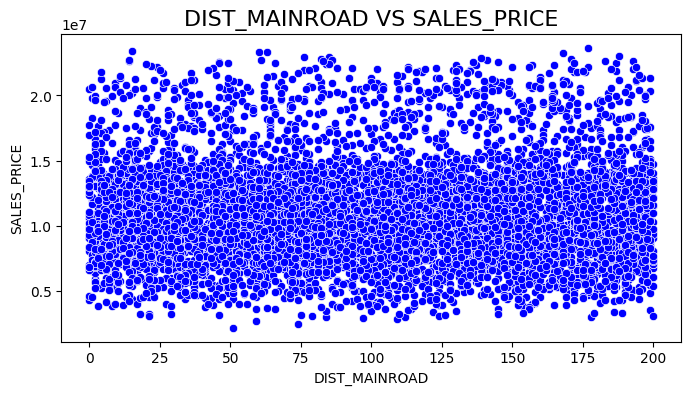

In [ ]:
#The plot DIST_MAINROAD  vs sales price
plt.figure(figsize=(8,4))
plt.title("DIST_MAINROAD VS SALES_PRICE",fontsize=16)
sp1=sns.scatterplot(x="DIST_MAINROAD" ,y="SALES_PRICE",data=data,color="b")
plt.show()



*   Distance of main road does not affect the sales price

*   drop the feature





**N_BEDROOM vs SALES_PRICE**

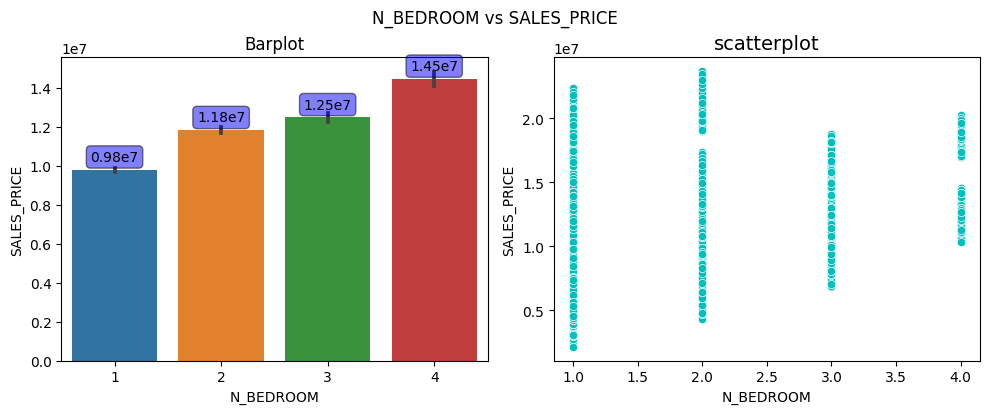

In [ ]:
#The plot INT_SQFT vs sales price
fig=plt.figure(figsize=(10,4))
fig.suptitle("N_BEDROOM vs SALES_PRICE",ha="center",va="bottom")
plt.subplot(121)
plt.title("Barplot",fontsize=12)
br8=sns.barplot(x="N_BEDROOM",y="SALES_PRICE",data=data)
for p in br8.patches:
  br8.annotate(str(round(p.get_height()/10**7,2))+"e7",xy=(p.get_x()+p.get_width()/2,p.get_height()+0.3*10**6),
               ha="center",va="bottom",bbox=dict(boxstyle="round",fc="b",alpha=0.5))
plt.subplot(122)
plt.title("scatterplot",fontsize=14)
sns.scatterplot(x="N_BEDROOM",y="SALES_PRICE",data=data,color="c")
plt.tight_layout()
plt.show()




*   Number of bedroom increases the sales price also increase
*   it is important feature



**N_BATHROOM vs SALES_PRICE**

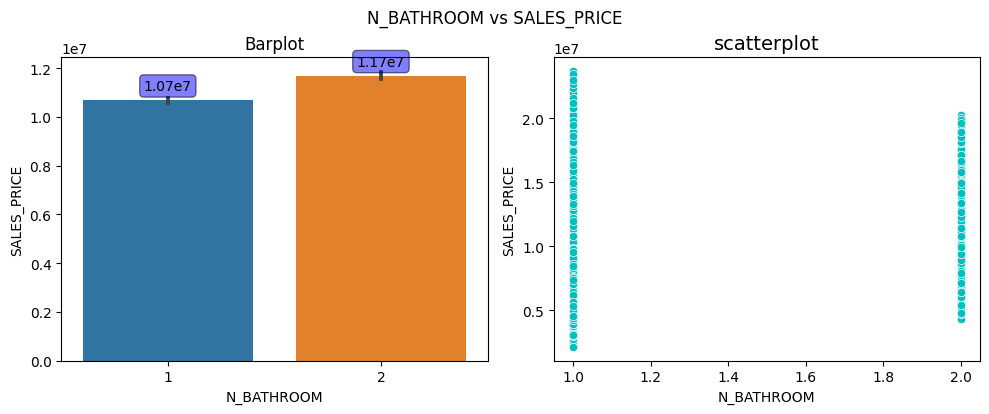

In [ ]:
#The plot N_BATHROOM vs sales price
fig=plt.figure(figsize=(10,4))
fig.suptitle("N_BATHROOM vs SALES_PRICE",ha="center",va="bottom")
plt.subplot(121)
plt.title("Barplot",fontsize=12)
br9=sns.barplot(x="N_BATHROOM",y="SALES_PRICE",data=data)
for p in br9.patches:
  br9.annotate(str(round(p.get_height()/10**7,2))+"e7",xy=(p.get_x()+p.get_width()/2,p.get_height()+0.3*10**6),
               ha="center",va="bottom",bbox=dict(boxstyle="round",fc="b",alpha=0.5))
plt.subplot(122)
plt.title("scatterplot",fontsize=14)
sns.scatterplot(x="N_BATHROOM",y="SALES_PRICE",data=data,color="c")
plt.tight_layout()
plt.show()





*   two bathroom is verylow



*   It's a label encoding feature







# Encoding the categorical feature

**AREA**

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031.0
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015.0
2,Adyar,909,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152.0
3,Velachery,1855,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030.0
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802.0


In [ ]:
data["AREA"] = data["AREA"].map({"Karapakkam": 1 , "Adyar" : 2, "Chrompet" : 3, "Velachery" :4, "KK Nagar" : 5, "Anna Nagar" : 6, "T Nagar" : 7})


In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,1,1004,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031.0
1,6,1986,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015.0
2,2,909,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152.0
3,4,1855,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030.0
4,1,1226,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802.0


In [ ]:
data["AREA"]=np.floor(pd.to_numeric(data['AREA'])).astype("Int64")

In [ ]:
data.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
7104,1,598,51,1,1,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,5353000,17942.0
7105,4,1897,52,3,2,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,10818480,3196.0
7106,4,1614,152,2,1,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,8351410,10455.0
7107,1,787,40,1,1,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,8507000,11443.0
7108,4,1896,156,3,2,5,Partial,Yes,1961-07-24,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,9976480,16060.0


**SALE_COND**

In [ ]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
data['SALE_COND']=data['SALE_COND'].map({"Partial":1,"Family":2,"AbNormal":3,"Normal Sale":4,"AdjLand":5})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,1,1004,131,1,1,3,3,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031.0
1,6,1986,26,2,1,5,3,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015.0
2,2,909,70,1,1,3,3,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152.0
3,4,1855,14,3,2,5,2,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030.0
4,1,1226,84,1,1,3,3,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802.0


**PARK_FACIL**

In [ ]:
data['PARK_FACIL']=data['PARK_FACIL'].map({"Yes":0,"No":1})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,1,1004,131,1,1,3,3,0,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031.0
1,6,1986,26,2,1,5,3,1,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015.0
2,2,909,70,1,1,3,3,0,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152.0
3,4,1855,14,3,2,5,2,1,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030.0
4,1,1226,84,1,1,3,3,0,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802.0


**UTILITY_AVAIL**

In [ ]:
data.UTILITY_AVAIL.unique()


array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [ ]:
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].map({'ELO':1,'NoSeWa':2,'NoSewr ':3,'AllPub':4})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,1,1004,131,1,1,3,3,0,1967-05-15,Commercial,4,Paved,A,4.0,3.9,4.9,4.330,7600000,16031.0
1,6,1986,26,2,1,5,3,1,1995-12-22,Commercial,4,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015.0
2,2,909,70,1,1,3,3,0,1992-09-02,Commercial,1,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152.0
3,4,1855,14,3,2,5,2,1,1988-03-18,Others,3,Paved,I,4.7,3.9,3.6,4.010,9630290,8030.0
4,1,1226,84,1,1,3,3,0,1979-10-13,Others,4,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802.0


**STREET**

In [ ]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data['STREET']=data['STREET'].map({'No Access':1,'Paved':2,'Gravel':3})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,1,1004,131,1,1,3,3,0,1967-05-15,Commercial,4,2,A,4.0,3.9,4.9,4.330,7600000,16031.0
1,6,1986,26,2,1,5,3,1,1995-12-22,Commercial,4,3,RH,4.9,4.2,2.5,3.765,21717770,4015.0
2,2,909,70,1,1,3,3,0,1992-09-02,Commercial,1,3,RL,4.1,3.8,2.2,3.090,13159200,7152.0
3,4,1855,14,3,2,5,2,1,1988-03-18,Others,3,2,I,4.7,3.9,3.6,4.010,9630290,8030.0
4,1,1226,84,1,1,3,3,0,1979-10-13,Others,4,3,C,3.0,2.5,4.1,3.290,7406250,10802.0


**MZZONE**

In [ ]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data['MZZONE']=data['MZZONE'].map({'A':1,'C':2,'I':3,'RH':4,'RL':5,'RM':6})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,1,1004,131,1,1,3,3,0,1967-05-15,Commercial,4,2,1,4.0,3.9,4.9,4.330,7600000,16031.0
1,6,1986,26,2,1,5,3,1,1995-12-22,Commercial,4,3,4,4.9,4.2,2.5,3.765,21717770,4015.0
2,2,909,70,1,1,3,3,0,1992-09-02,Commercial,1,3,5,4.1,3.8,2.2,3.090,13159200,7152.0
3,4,1855,14,3,2,5,2,1,1988-03-18,Others,3,2,3,4.7,3.9,3.6,4.010,9630290,8030.0
4,1,1226,84,1,1,3,3,0,1979-10-13,Others,4,3,2,3.0,2.5,4.1,3.290,7406250,10802.0


In [ ]:
#get dummies data 
data=pd.get_dummies(data)

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,3,0,1967-05-15,4,2,1,4.0,3.9,4.9,4.330,7600000,16031.0,1,0,0
1,6,1986,26,2,1,5,3,1,1995-12-22,4,3,4,4.9,4.2,2.5,3.765,21717770,4015.0,1,0,0
2,2,909,70,1,1,3,3,0,1992-09-02,1,3,5,4.1,3.8,2.2,3.090,13159200,7152.0,1,0,0
3,4,1855,14,3,2,5,2,1,1988-03-18,3,2,3,4.7,3.9,3.6,4.010,9630290,8030.0,0,0,1
4,1,1226,84,1,1,3,3,0,1979-10-13,4,3,2,3.0,2.5,4.1,3.290,7406250,10802.0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AREA                  7109 non-null   Int64         
 1   INT_SQFT              7109 non-null   int64         
 2   DIST_MAINROAD         7109 non-null   int64         
 3   N_BEDROOM             7109 non-null   int64         
 4   N_BATHROOM            7109 non-null   int64         
 5   N_ROOM                7109 non-null   int64         
 6   SALE_COND             7109 non-null   int64         
 7   PARK_FACIL            7109 non-null   int64         
 8   DATE_BUILD            7109 non-null   datetime64[ns]
 9   UTILITY_AVAIL         7109 non-null   int64         
 10  STREET                7109 non-null   int64         
 11  MZZONE                7109 non-null   int64         
 12  QS_ROOMS              7109 non-null   float64       
 13  QS_BATHROOM       

In [ ]:
#Again cheek nal value 
data.isna().sum()

AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
DATE_BUILD              0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
SALES_PRICE             0
BUILD_AGE               0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

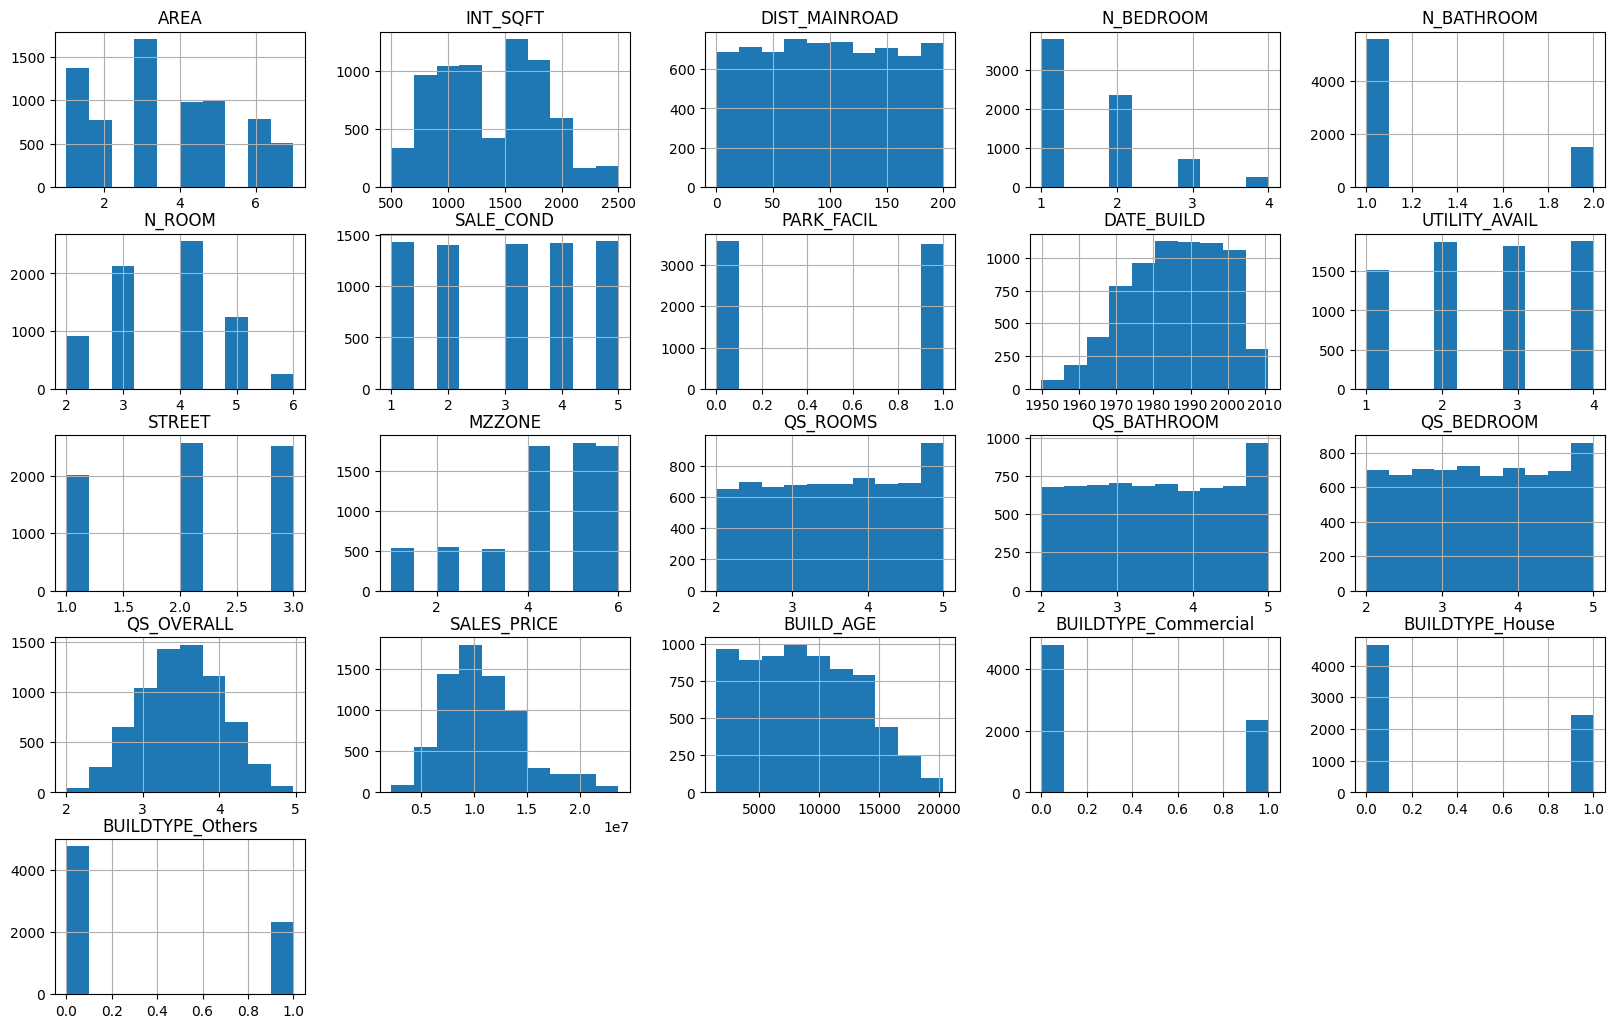

In [ ]:
data.hist(bins=10,figsize=(20,12.5))
plt.show()

CORELATION 

In [ ]:
data.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
AREA,1.000000,0.685243,0.003487,0.320889,-0.044401,0.644971,-0.001571,-0.007916,0.049250,0.071459,0.346385,0.022620,0.002351,0.004147,0.017745,0.694149,-0.072195,0.012488,-0.013170,0.000839
INT_SQFT,0.685243,1.000000,0.002022,0.786263,0.515290,0.951279,0.004029,-0.004618,0.068096,0.091727,0.143226,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.013014,0.008927,-0.006848,-0.001995
DIST_MAINROAD,0.003487,0.002022,1.000000,-0.002723,0.001850,0.002301,-0.009342,0.009448,-0.007112,0.001942,0.007334,0.002237,-0.029468,0.001554,-0.017255,0.018783,-0.003375,0.022109,-0.019417,-0.002458
N_BEDROOM,0.320889,0.786263,-0.002723,1.000000,0.755207,0.840209,0.006868,0.009357,0.084271,0.117058,0.049928,0.014948,-0.007534,0.015752,0.014245,0.330987,-0.046228,-0.000534,0.004914,-0.004435
N_BATHROOM,-0.044401,0.515290,0.001850,0.755207,1.000000,0.568541,0.010695,0.014033,0.050504,0.071575,-0.047164,0.013376,-0.012043,0.013191,0.007961,0.108834,-0.020522,-0.006099,0.018195,-0.012305
N_ROOM,0.644971,0.951279,0.002301,0.840209,0.568541,1.000000,0.000969,0.000934,0.063340,0.089961,0.163697,0.016524,-0.007545,0.015072,0.015418,0.602760,-0.033777,0.008826,-0.005288,-0.003472
SALE_COND,-0.001571,0.004029,-0.009342,0.006868,0.010695,0.000969,1.000000,-0.003936,-0.010606,-0.002525,0.000122,-0.007720,0.004049,0.003840,0.001542,0.054370,0.011184,-0.005805,-0.000835,0.006645
PARK_FACIL,-0.007916,-0.004618,0.009448,0.009357,0.014033,0.000934,-0.003936,1.000000,0.030558,0.000990,0.007192,0.008128,0.011935,0.001165,0.009601,-0.146428,0.009482,-0.010702,0.010172,0.000407
UTILITY_AVAIL,0.049250,0.068096,-0.007112,0.084271,0.050504,0.063340,-0.010606,0.030558,1.000000,0.038551,0.026942,0.012047,-0.017148,0.016026,0.005474,0.064418,-0.039263,0.025137,-0.000541,-0.024570
STREET,0.071459,0.091727,0.001942,0.117058,0.071575,0.089961,-0.002525,0.000990,0.038551,1.000000,0.041091,0.002539,0.003555,0.023809,0.015015,0.149589,-0.039961,-0.013480,0.014170,-0.000860


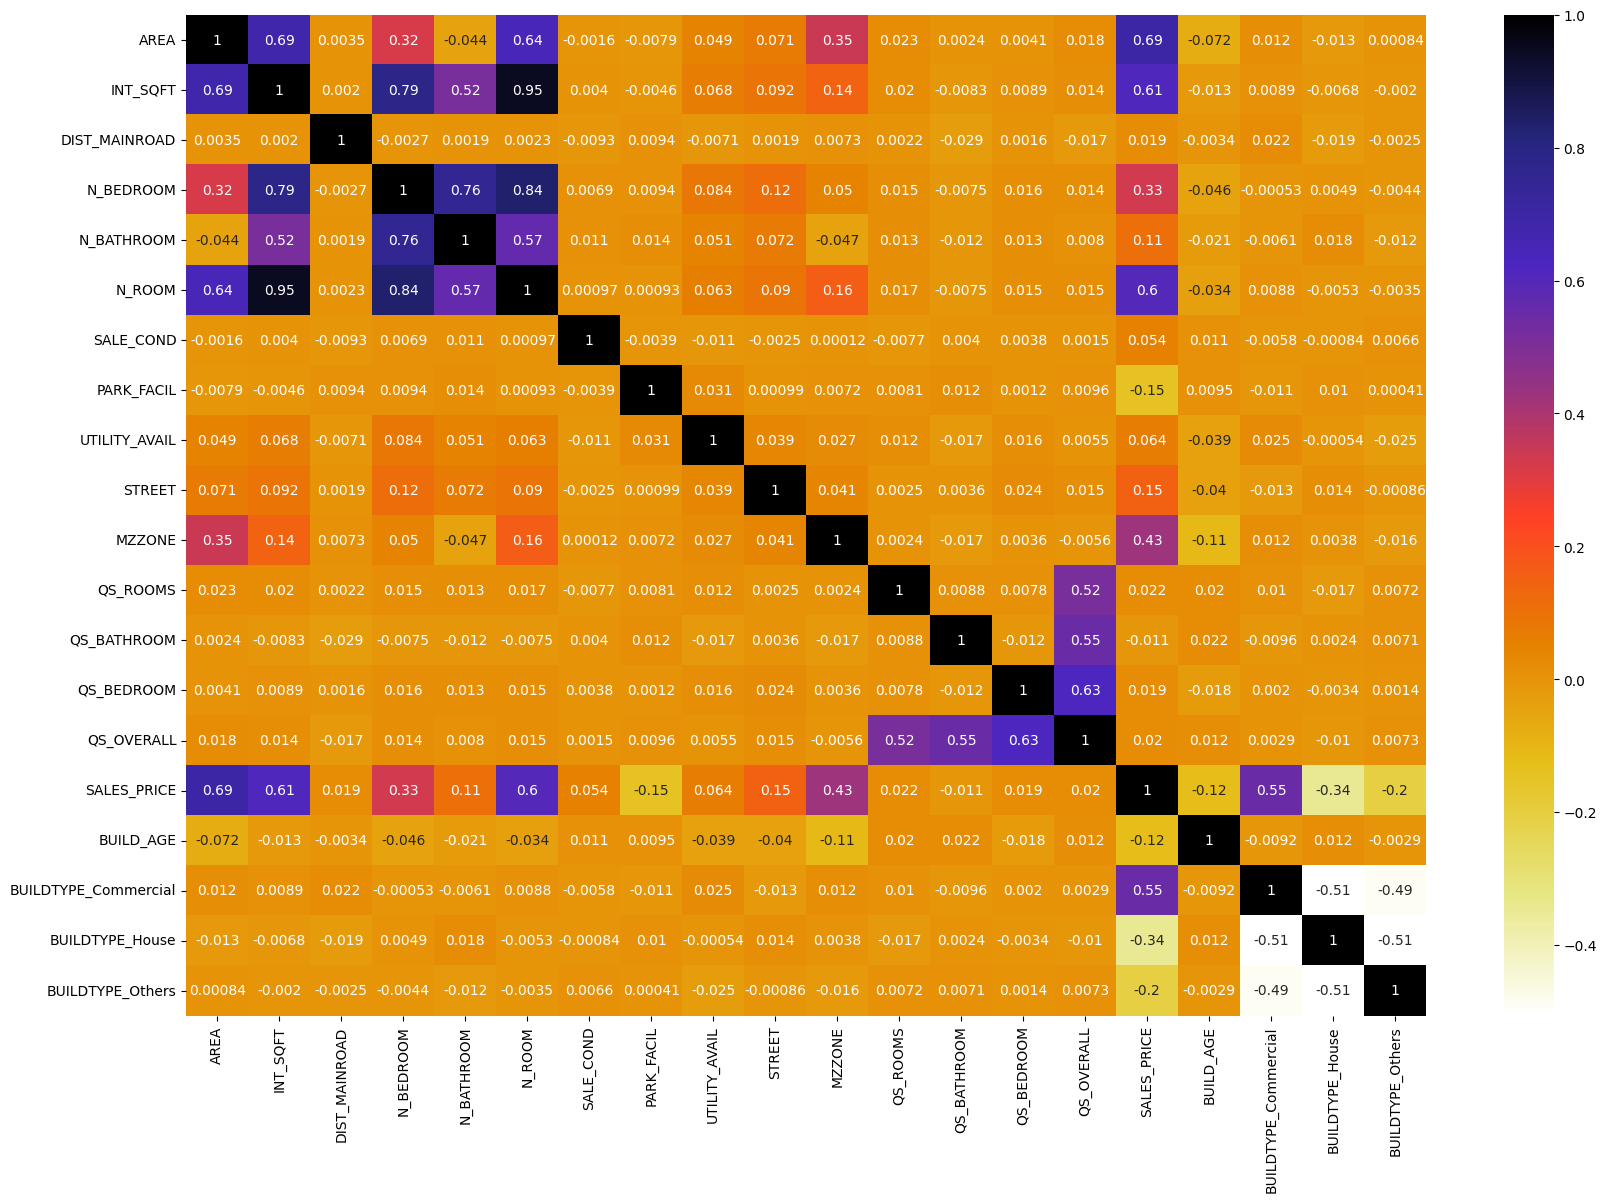

In [ ]:
plt.figure(figsize=(20,13))
roc=data.corr()
sns.heatmap(roc,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()


DROP UNNECESSARY COLUMNS 
---



In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [ ]:
data.drop(['DATE_BUILD','DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL'],axis=1,inplace=True)

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILD_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,3,0,4,2,1,7600000,16031.0,1,0,0
1,6,1986,2,1,5,3,1,4,3,4,21717770,4015.0,1,0,0
2,2,909,1,1,3,3,0,1,3,5,13159200,7152.0,1,0,0
3,4,1855,3,2,5,2,1,3,2,3,9630290,8030.0,0,0,1
4,1,1226,1,1,3,3,0,4,3,2,7406250,10802.0,0,0,1


# SPLIT THE DATA

In [ ]:
x=data.drop(['SALES_PRICE'],axis=1).copy()
y=data['SALES_PRICE'].copy()

In [ ]:
x.shape,y.shape

((7109, 14), (7109,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,random_state=47,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5687, 14), (1422, 14), (5687,), (1422,))

# **Feature scaling**



*   It is necessary to scale the features for parametric models.

*   Non parametric models like Random Forest and Decision Tree can handle unscaled data without any learning issue.







In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
print(x_train)

[[ 1.86732609  0.59408023 -0.79436305 ... -0.68853456  1.36723221
  -0.70161189]
 [-1.37641981 -1.1846811  -0.79436305 ...  1.45235993 -0.73140465
  -0.70161189]
 [ 1.86732609  0.56348728 -0.79436305 ... -0.68853456 -0.73140465
   1.42528941]
 ...
 [ 0.24545314  0.35807749  0.45842194 ... -0.68853456 -0.73140465
   1.42528941]
 [-0.8357955  -0.97490089 -0.79436305 ...  1.45235993 -0.73140465
  -0.70161189]
 [ 0.78607745  2.04724519  2.9639919  ...  1.45235993 -0.73140465
  -0.70161189]]


In [ ]:
print(x_test)

[[ 0.24545314  1.22560605  1.71120692 ... -0.68853456  1.36723221
  -0.70161189]
 [-0.29517118 -0.55315527 -0.79436305 ... -0.68853456 -0.73140465
   1.42528941]
 [ 0.24545314  0.74923017  0.45842194 ... -0.68853456  1.36723221
  -0.70161189]
 ...
 [ 1.86732609  1.33268136  0.45842194 ...  1.45235993 -0.73140465
  -0.70161189]
 [ 0.78607745  1.22997647  1.71120692 ...  1.45235993 -0.73140465
  -0.70161189]
 [-0.29517118 -0.21444765  0.45842194 ...  1.45235993 -0.73140465
  -0.70161189]]


# BUILDING THE MACHINE LEARNING MODEL

 **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
lrn=LinearRegression().fit(x_train,y_train)
#predict=pred
y_pred=lrn.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
lrn_score=metrics.r2_score(y_test,y_pred)
lrn_mae=metrics.mean_absolute_error(y_test,y_pred)

print("Training score: {:.2f}".format(lrn.score(x_train,y_train)))

print("Test score:{:.2f}".format(lrn.score(x_test,y_test)))

Training score: 0.92
Test score:0.92


In [ ]:
print("R2 score:{:.2f}".format(metrics.r2_score(y_test,y_pred)))

print("MSER:{:.2f}".format(metrics.mean_squared_error(y_test,y_pred)))

print("MAER:{:.2f}".format(metrics.mean_absolute_error(y_test,y_pred)))

R2 score:0.92
MSER:1105040668023.97
MAER:801954.66


In [ ]:
lrn_prediction=pd.DataFrame({"Actual":y_test,"Predicted":y_pred.flatten()})
lrn_prediction.head(20)

,Actual,Predicted
3410,8905050,9.046331e+06
5610,10897710,1.043204e+07
72,8956480,9.592699e+06
4268,13197400,1.404436e+07
2399,20819590,1.822373e+07
661,12356960,1.286969e+07
3798,8344040,7.463187e+06
708,6298700,5.207131e+06
3464,19959560,1.844726e+07
2126,11515200,1.248064e+07


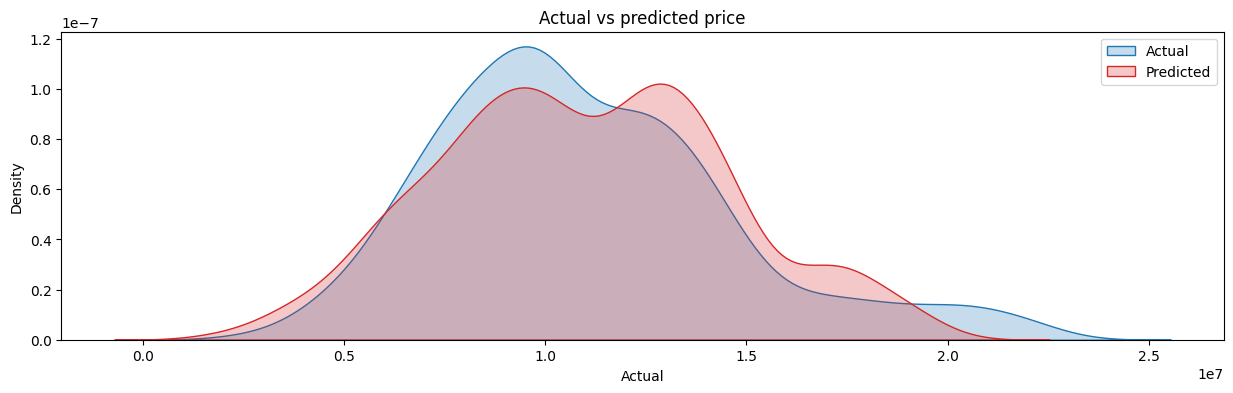

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=lrn_prediction,x="Actual",label="Actual",
            shade=True)
sns.kdeplot(data=lrn_prediction,x="Predicted",label="Predicted",color="#d62728",shade=True)
plt.title("Actual vs predicted price")
plt.legend()
plt.show()




*   Linear regression model has 92%r2 score
*   The actual price vs predicted price fit the model



 **KNN REGRESSORS**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_regressor=KNeighborsRegressor().fit(x_train,y_train)
knn_pred=knn_regressor.predict(x_test)

In [ ]:
print("KNN regressor score:{:.2f}".format(knn_regressor.score(x_train,y_train)))
print("KNN regressor score:{:.2f}".format(knn_regressor.score(x_test,y_test)))

KNN regressor score:0.97
KNN regressor score:0.95


Cross validation of KNN regressor

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score,RepeatedKFold

In [ ]:
knn_search =GridSearchCV(estimator=KNeighborsRegressor(),param_grid=dict(n_neighbors=[2,5,10,15,20,24,25,28,30]),cv=3)
knn_search.fit(x,y)
print("Best parameters:",knn_search.best_params_)
print("Best score:",knn_search.best_score_)

Best parameters: {'n_neighbors': 28}
Best score: 0.3978651538825268


 **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dsnt_regressor=DecisionTreeRegressor(max_depth=7).fit(x_train,y_train)
dsnt_y_predict =dsnt_regressor.predict(x_test)

In [ ]:
dsnt_score=metrics.r2_score(y_test,dsnt_y_predict)
dsnt_mea=metrics.mean_absolute_error(y_test,dsnt_y_predict)

In [ ]:
print("DSNT Training score:{:.2f}".format(dsnt_regressor.score(x_train,y_train)))
print("DSNT Test score:{:.2f}".format(dsnt_regressor.score(x_test,y_test)))


DSNT Training score:0.96
DSNT Test score:0.95


In [ ]:
print("DSNT R2 score:{:.2f}".format(metrics.r2_score(y_test,dsnt_y_predict)))
print("DSNT MSE:{:.2f}".format(metrics.mean_squared_error(y_test,dsnt_y_predict)))
print("DSNT MAE:{:.2f}".format(metrics.mean_absolute_error(y_test,dsnt_y_predict)))

DSNT R2 score:0.95
DSNT MSE:735499764483.62
DSNT MAE:692197.14


In [ ]:
dsnt_prediction=pd.DataFrame({"Actual":y_test,"Predicted":dsnt_y_predict.flatten()})
dsnt_prediction.head(20)

,Actual,Predicted
3410,8905050,8.466949e+06
5610,10897710,9.963292e+06
72,8956480,1.085277e+07
4268,13197400,1.171397e+07
2399,20819590,2.167911e+07
661,12356960,1.259746e+07
3798,8344040,7.903672e+06
708,6298700,6.991802e+06
3464,19959560,1.852064e+07
2126,11515200,1.346861e+07


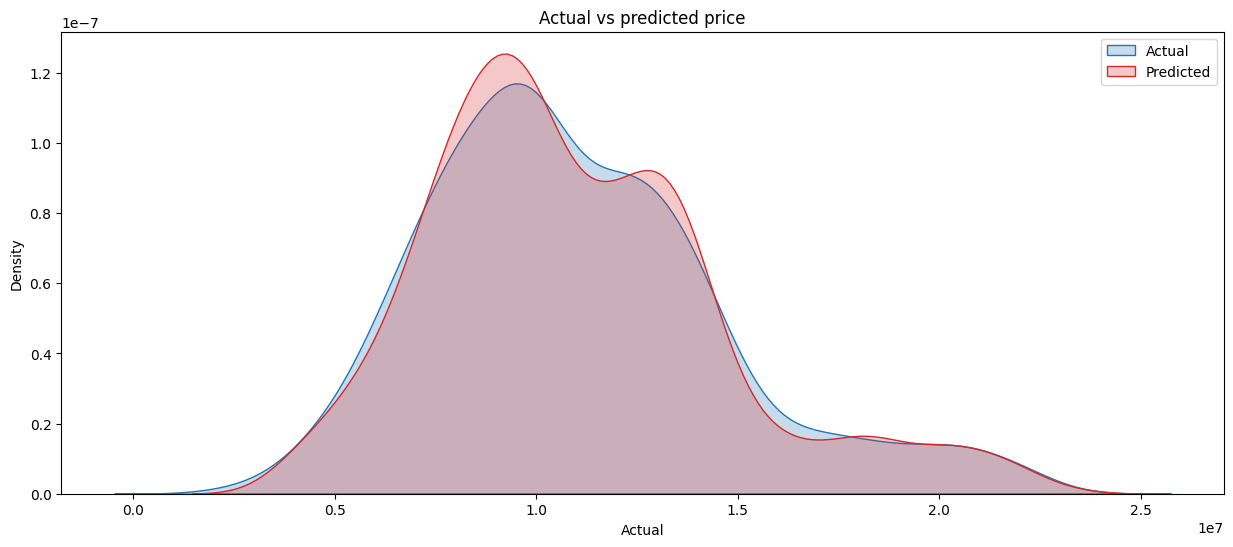

In [ ]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=dsnt_prediction,x="Actual",label="Actual",
            shade=True)
sns.kdeplot(data=dsnt_prediction,x="Predicted",label="Predicted",color="#d62728",shade=True)
plt.title("Actual vs predicted price")
plt.legend()
plt.show()



*   Decision tree progressive equal to predic value better prediction model
*   95% of data 






  **Random Forest Regression** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [ ]:
rf_regressor=RandomForestRegressor(random_state=0).fit(x_train,y_train)
rf_y_predict=rf_regressor.predict(x_test)

In [ ]:
rf_score=metrics.r2_score(y_test,rf_y_predict)
rf_mae=metrics.mean_absolute_error(y_test,rf_y_predict)

In [ ]:
print("RF Training score:{:.2f}".format(rf_regressor.score(x_train,y_train)))
print("RF Test score:{:.2f}".format(rf_regressor.score(x_test,y_test)))

In [ ]:
print("RF R2 score:{:.4f}".format(metrics.r2_score(y_test,rf_y_predict)))
print("RF MSE:{:.2f}".format(metrics.mean_squared_error(y_test,rf_y_predict)))
print("RF MAE:{:.2f}".format(metrics.mean_absolute_error(y_test,rf_y_predict)))



*   The random forest  regressor is more than decision tree
*   99%R2 value 



In [ ]:
rf_prediction=pd.DataFrame({"Actual":y_test,"Predicted":rf_y_predict.flatten()})
rf_prediction.head(20)

,Actual,Predicted
3410,8905050,8424652.00
5610,10897710,10575179.50
72,8956480,9618304.10
4268,13197400,12962238.95
2399,20819590,21015090.70
661,12356960,12100439.30
3798,8344040,8222897.60
708,6298700,6656019.20
3464,19959560,18983076.20
2126,11515200,11797577.90


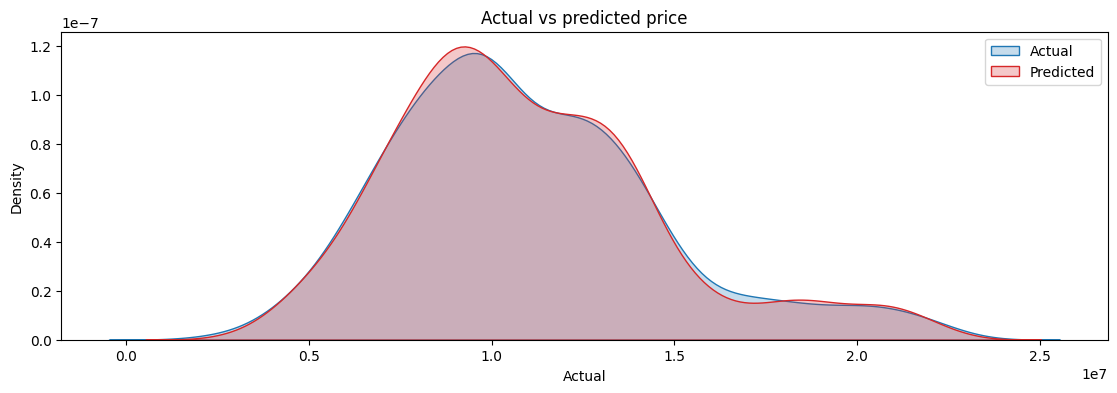

In [ ]:
plt.figure(figsize=(13.5,4))
sns.kdeplot(data=rf_prediction,x="Actual",label="Actual",shade=True)
sns.kdeplot(data=rf_prediction,x="Predicted",label="Predicted",color="#d62728",shade=True)
plt.title("Actual vs predicted price")
plt.legend()
plt.show()



*   The predict price was near close to actual value
*   Random forest model one of thebetter prediction of the model



ADABOOST REGRESSION 

In [ ]:
ada_regressor=AdaBoostRegressor(random_state=1).fit(x_train,y_train)
ada_y_predict=ada_regressor.predict(x_test)

In [ ]:
adaboost_score=metrics.r2_score(y_test,ada_y_predict)
adaboost_mae=metrics.mean_absolute_error(y_test,ada_y_predict)

In [ ]:
print("Adaboost Training score:{:.2f}".format(ada_regressor.score(x_train,y_train)))
print("Adaboost Test score:{:.2f}".format(ada_regressor.score(x_test,y_test)))

Adaboost Training score:0.93
Adaboost Test score:0.92


In [ ]:
adaboost_prediction=pd.DataFrame({"Actual":y_test,"Predicted":ada_y_predict.flatten()})
adaboost_prediction.head(10)

,Actual,Predicted
3410,8905050,9.058342e+06
5610,10897710,9.427519e+06
72,8956480,1.041137e+07
4268,13197400,1.140666e+07
2399,20819590,2.021772e+07
661,12356960,1.205664e+07
3798,8344040,8.610142e+06
708,6298700,8.412076e+06
3464,19959560,1.764022e+07
2126,11515200,1.140120e+07


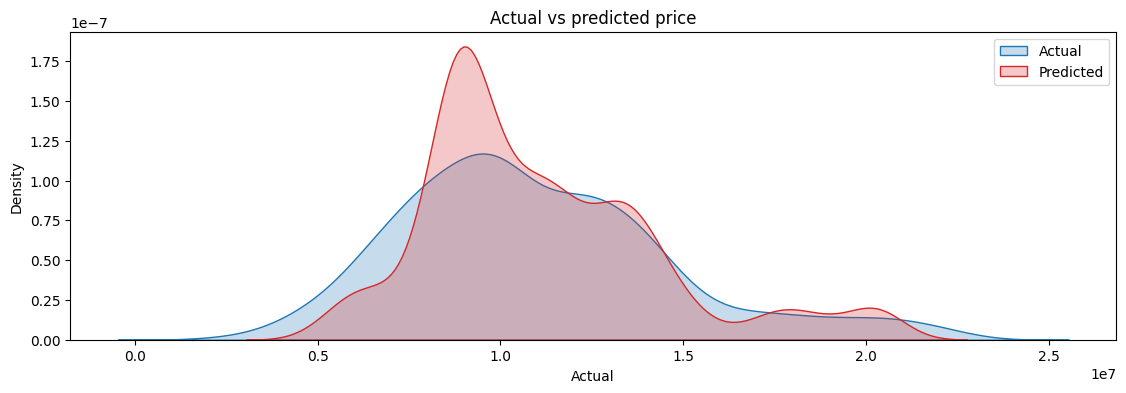

In [ ]:
plt.figure(figsize=(13.5,4))
sns.kdeplot(data=adaboost_prediction,x="Actual",label="Actual",shade=True)
sns.kdeplot(data=adaboost_prediction,x="Predicted",label="Predicted",color="#d62728",shade=True)
plt.title("Actual vs predicted price")
plt.legend()
plt.show()

It performs not look so good

**XGBOOST REGRESSION**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_regressor=XGBRegressor().fit(x_train,y_train)
xg_y_predict=xg_regressor.predict(x_test)

[05:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xg_score=metrics.r2_score(y_test,xg_y_predict)
xg_mea=metrics.mean_absolute_error(y_test,xg_y_predict)

In [ ]:
print("XG R2 score:{:.4f}".format(metrics.r2_score(y_test,xg_y_predict)))
print("XG MSE:{:.2f}".format(metrics.mean_squared_error(y_test,xg_y_predict)))
print("XG MAE:{:.2f}".format(metrics.mean_absolute_error(y_test,xg_y_predict)))

XG R2 score:0.9894
XG MSE:148282491139.70
XG MAE:289494.53


In [ ]:
xgboost_prediction=pd.DataFrame({"Actual":y_test,"Predicted":xg_y_predict.flatten()})
xgboost_prediction.head(10)

,Actual,Predicted
3410,8905050,8699948.0
5610,10897710,10617320.0
72,8956480,9654788.0
4268,13197400,12908306.0
2399,20819590,20457142.0
661,12356960,12334572.0
3798,8344040,8371256.0
708,6298700,6908004.5
3464,19959560,19120248.0
2126,11515200,12083262.0


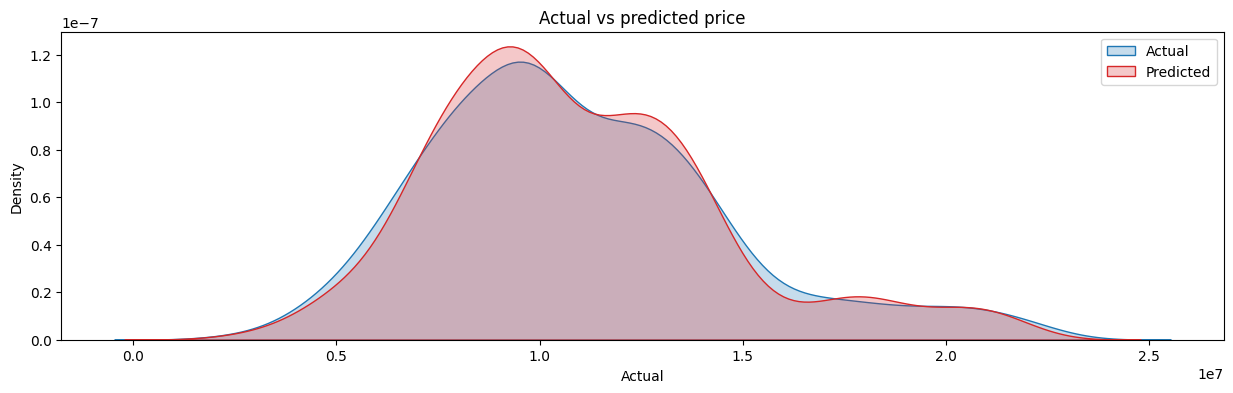

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=xgboost_prediction,x="Actual",label="Actual",shade=True)
sns.kdeplot(data=xgboost_prediction,x="Predicted",label="Predicted",color="#d62728",shade=True)
plt.title("Actual vs predicted price")
plt.legend()
plt.show()



*   The Xgboost better accuracy value
*   The actual value and predic value it close to fit



# MODEL COMPARISON

Let's compare Actual value and predic value of Xgboost and Random Forest Regression

In [ ]:
model_data=pd.DataFrame({"model":"RandomForest Xgboost".split(),
             "r2score":[rf_score,xg_score],
             "mae":[rf_mae,xg_mea]
             })
model_data

,model,r2score,mae
0,RandomForest,0.988976,306977.526090
1,Xgboost,0.989433,289494.526547




*   RandomForest and Xgboost both are better score for house price data set




In [ ]:
XG=XGBRegressor(n_estimators=100)
XG.fit(x_train,y_train) 

[05:43:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
XG.feature_importances_

array([0.23758988, 0.07015952, 0.00243529, 0.0005254 , 0.22931351,
       0.00477766, 0.02239742, 0.00163622, 0.01426024, 0.05413164,
       0.00274429, 0.33739063, 0.02263834, 0.        ], dtype=float32)

In [ ]:
feature_scores=pd.Series(XG.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_scores

BUILDTYPE_Commercial    0.337391
AREA                    0.237590
N_ROOM                  0.229314
INT_SQFT                0.070160
MZZONE                  0.054132
BUILDTYPE_House         0.022638
PARK_FACIL              0.022397
STREET                  0.014260
SALE_COND               0.004778
BUILD_AGE               0.002744
N_BEDROOM               0.002435
UTILITY_AVAIL           0.001636
N_BATHROOM              0.000525
BUILDTYPE_Others        0.000000
dtype: float32

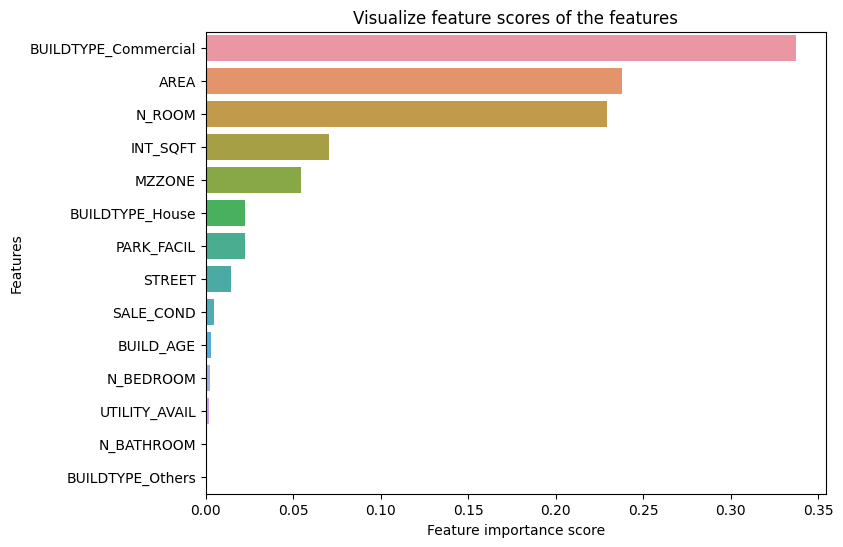

In [ ]:
 # Creating a seaborn bar plot
f,ax=plt.subplots(figsize=(8, 6))
ax=sns.barplot(x=feature_scores,y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

**BUILDTYPE_Commercial**

*   Commercial real estate has been historically seen as a safe investment from an investment perspective. The building's initial investment costs and the maintenance costs for tenants are much higher than residential real estate, but the total returns are also higher, and some of the typical problems that come with residential tenants are not present when dealing with a business and straightforward leases.



**AREA**

*   The area creates desirability, desirability creates demand, and demand raises real estate prices. When you buy your property in a good location, you may pay a little more, but buying in a good location means you have many more profitable options down the road.



**NUMBER OF ROOM**

*   It’s one of the most basic questions you’ll answer as you begin your home search. Although the question seems simple, your response will require careful consideration. The average home size has nearly doubled since resulting in some buyer’s need for more rooms and more square footage.



**THE INTERIOR SQUARE FEET OF PROPERTY**

*   One popular formula to help you decide if a property is good investment is the 1 percent rule, which advises that the property's monthly rent should be no less than 1 percent of the upfront cost, including any initial renovations and the purchase price



**MZZONE**

*   House Plan Zone is committed to providing you with the very best in architectural design. We offer a variety of professionally-designed floor plans ready for building your dream home.





  **BUILDTYPE_House**
*   home can do many things for a family but most importantly it can help bring a family close together. The process of building a home is a great opportunity to enhance new techniques and advance your communication. Home construction might not be an easy task but it can definitely make a huge impact in lives.





 **PARKING FACILITY**
*   If there is a parking facility in every apartment, people will not park their vehicles on the streets or in front of a neighbours house and trouble the next door residents. Emergency vehicles such as ambulances, police patrolling vehicles and fire tenders are most likely to get affected by street parking





**STREET**
*   Streets are the interstitial spaces that enable cities: they provide a network for all of the dynamic social, economic, and physical activities that make cities vital human habitat. By design, streets channel and convey stormwater, providing a network along which all the rain that falls on the city can be routed.

